# Problem Statement:
## The goal of this project is to build a machine learning model that can accurately predict payment fraud by distinguishing between legitimate and fraudelent transactions based on their characteriistics such as transaction amount , type, and accounts involved. By using a dataset of both fraudulent and non fraudulent financial transactions the model can be trained to achieve high accuracy which can be used by financial institutions to prevent financial losses and protect their customers assets in real time.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
data = pd.read_csv("onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

# EDA


In [8]:
#checking null values in the data
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
#summary of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: xlabel='amount'>

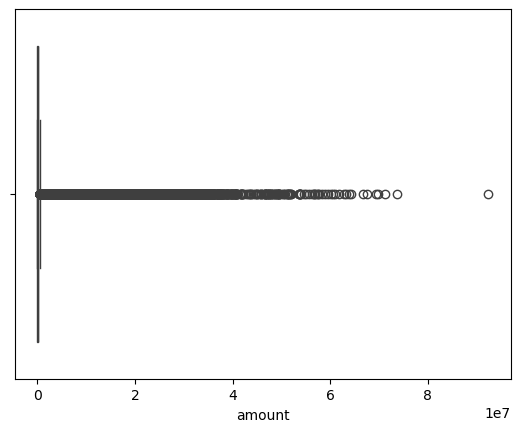

In [16]:
#checking outliers 
sns.boxplot(data,x='amount')

Text(0.5, 1.0, 'Scatter plot of amount')

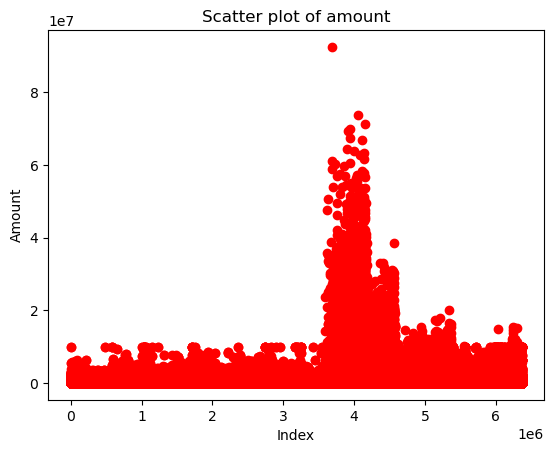

In [18]:
plt.scatter(data.index,data['amount'],color='red')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('Scatter plot of amount')

In [20]:
#finding outliers using IQR method
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = data[(data['amount']<lower_bound)|(data['amount']>upper_bound)]
outliers

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [22]:
outliers.shape

(338078, 11)

In [24]:
print(len(outliers[outliers.isFraud==1]))

3854


In [26]:
#number of fraud and legit transactions
print("number of legit transactions:", len(data[data.isFraud==0]))
print("number of fraud transactions:", len(data[data.isFraud==1]))

number of legit transactions: 6354407
number of fraud transactions: 8213


# clearly we can see that this is a highly imbalanced data so removing the outliers may make model biased

<Axes: >

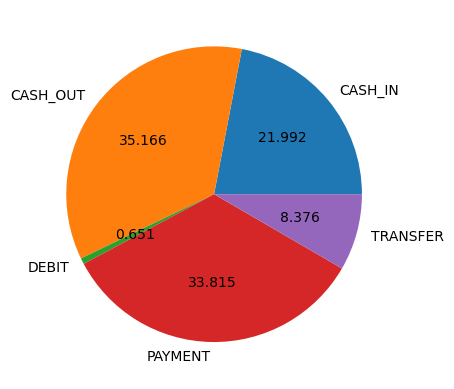

In [30]:
data.groupby('type').size().plot(kind='pie',autopct='%.3f')

In [32]:
#categorical features present in the dataset
cat_var = data.select_dtypes(include="object").columns
cat_var

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [34]:
#label encoding for object datatypes for numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_var:
    data[i] = le.fit_transform(data[i].astype(str))
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


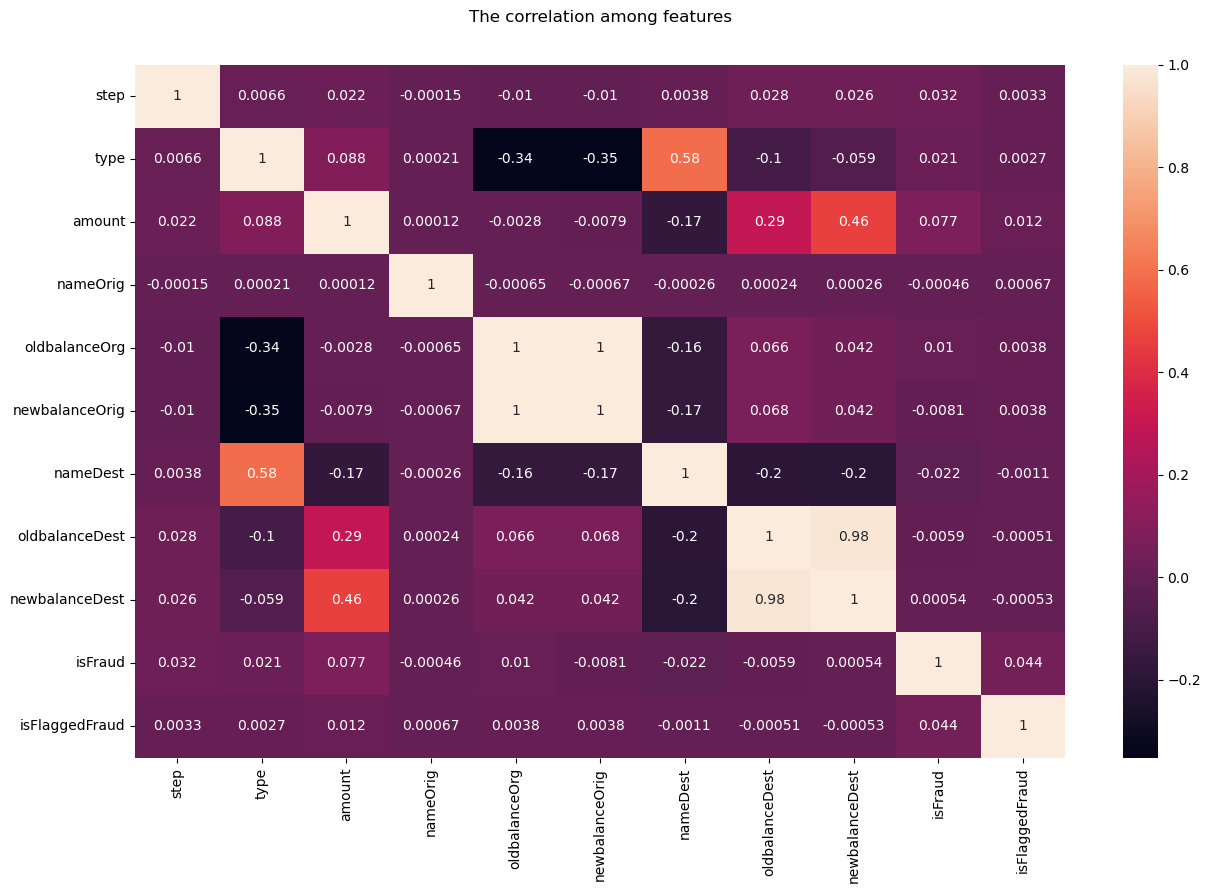

In [35]:
#checking correlation between the features
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot = True)
plt.title('The correlation among features',y= 1.05)
plt.show()

# from the correlation heatmap we can see that nameOrig and nameDest are negatively correlated with the outcome variable i.e., isFraud so we drop them also step feature is not much significant so we drop it as well

In [39]:
#checking the multicollinearity using VIF values for each features
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = data[['type', 'amount','nameOrig', 'oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

          feature         VIF
0            type    4.193131
1          amount    4.041752
2        nameOrig    2.249763
3   oldbalanceOrg  487.189887
4  newbalanceOrig  491.508583
5        nameDest    3.281653
6  oldbalanceDest   71.589194
7  newbalanceDest   83.131901
8  isFlaggedFraud    1.000581


## Since the effect of oldbalanceOrg and newbalanceOrig are explained by each other and vice versa similarly the effect of oldbalanceDest and newbalanceDest are also explained by each other. So knowing the VIF is very high we can not drop them . So we simply make a new column and combined these two oldbalance and newbalance columns.

In [42]:
data['Amount_orig'] = data.apply(lambda x : x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
data['Amount_dest'] = data.apply(lambda x : x['newbalanceDest']-x['oldbalanceDest'],axis=1)
data= data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest','step'],axis=1)
data.head()

,type,amount,isFraud,isFlaggedFraud,Amount_orig,Amount_dest
0,3,9839.64,0,0,9839.64,0.0
1,3,1864.28,0,0,1864.28,0.0
2,4,181.00,1,0,181.00,0.0
3,1,181.00,1,0,181.00,-21182.0
4,3,11668.14,0,0,11668.14,0.0


In [43]:
#calculating VIF for the cleaned data
X = data[['type', 'amount','isFlaggedFraud','Amount_orig','Amount_dest']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

          feature       VIF
0            type  1.092348
1          amount  3.663537
2  isFlaggedFraud  1.000532
3     Amount_orig  1.045521
4     Amount_dest  3.612654


# Model Building

In [47]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [49]:
#scaling
scaler = StandardScaler()
data['Normalized_Amount'] = scaler.fit_transform(data['amount'].values.reshape(-1,1))
data['Normalized_type'] = scaler.fit_transform(data['type'].values.reshape(-1,1))
data['Normalized_Amount_orig'] = scaler.fit_transform(data['Amount_orig'].values.reshape(-1,1))
data['Normalized_Amount_dest'] = scaler.fit_transform(data['Amount_dest'].values.reshape(-1,1))
new_data = data.drop(['amount','type','Amount_orig','Amount_dest'],axis=1)

new_data.head()

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_type,Normalized_Amount_orig,Normalized_Amount_dest
0,0,0,-0.281560,0.952399,0.211876,-0.152896
1,0,0,-0.294767,0.952399,0.157490,-0.152896
2,1,0,-0.297555,1.693076,0.146011,-0.152896
3,1,0,-0.297555,-0.528954,0.146011,-0.178952
4,0,0,-0.278532,0.952399,0.224345,-0.152896


In [51]:
#splitting the data
Y = new_data['isFraud']
X = new_data.drop(['isFraud'],axis=1)
(X_train,X_test,Y_train,Y_test) = tts(X,Y,test_size=0.2,random_state=22)
print(X_train.shape)
print(X_test.shape)

(5090096, 5)
(1272524, 5)


In [53]:
#fitting a logistics regression model
lr = LogisticRegression()
model = lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test,Y_test)*100
lr_score

99.91489355014129

classification report for logistic regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.86      0.41      0.55      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.71      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524

confusion matrix for logistic regression


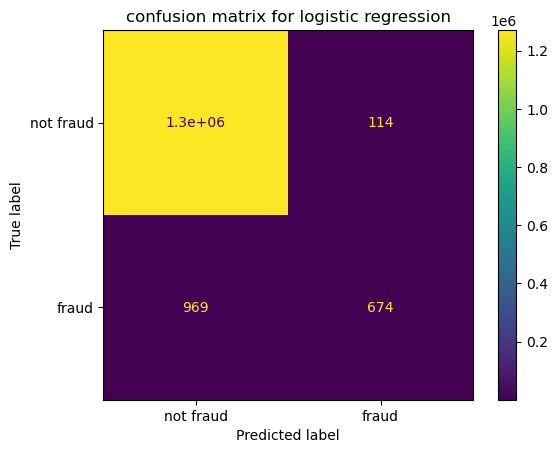

In [55]:
#classification report for logistic regression
cr = classification_report(Y_test,lr_pred)
print('classification report for logistic regression')
print(cr)
confu_mat = confusion_matrix(Y_test,lr_pred.round())
print('confusion matrix for logistic regression')
display_labels = ['not fraud','fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix=confu_mat,display_labels=display_labels)
matrix.plot()
plt.title('confusion matrix for logistic regression')
plt.show()

### here we fitted logistic regression and decision tree classifier and acheived an impressive accuracy of 99.9%. but as the data is highly imbalanced therefore accuracy is not the correct measure .. hence here we use recall . recall =.99